# **Data Visualization Project**

# **Classification of Psychiatric Disorders using processed EEG signals**

Completed by:


*   Shreyas Rajapur Sanjay
*   Revanth Nagaraj Mallol
*   Nihal Malavalli Lokesh Lnu





# **Dataset Loading**

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/EEG.machinelearing_data_BRMH.csv")

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (945, 1149)


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


# **Dataset Pre-processing**

In [4]:
print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (945, 1149)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB


In [6]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   no. sex   age    eeg.date  education     IQ       main.disorder  \
0    1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1    2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2    3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3    4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4    5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   

      specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0  Alcohol use disorder         35.998557         21.717375  ...   
1  Alcohol use disorder         13.425118         11.002916  ...   
2  Alcohol use disorder         29.941780         27.544684  ...   
3  Alcohol use disorder         21.496226         21.846832  ...   
4  Alcohol use disorder         37.775667         33.607679  ...   

   COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0              55.989192              16.739679              23.452271   
1      

# **Removing Missing values**

In [7]:
import pandas as pd

df = df.dropna(axis=1, how='all')
print("Shape after dropping all-NaN columns:", df.shape)

df= df.dropna()
print("Shape after dropping rows with any NaN:", df.shape)

total_missing = df.isnull().sum().sum()
print("Total missing values after cleaning:", total_missing)

df.info()

Shape after dropping all-NaN columns: (945, 1148)
Shape after dropping rows with any NaN: (919, 1148)
Total missing values after cleaning: 0
<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 1 to 944
Columns: 1148 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1143), int64(1), object(4)
memory usage: 8.1+ MB


# **Checking and Handling with the duplicated values**

In [8]:
dup_count = df.duplicated().sum()
print(f"Number of fully duplicated rows: {dup_count}")

if dup_count > 0:
    print("\nExample duplicates:")
    print(df[df.duplicated(keep=False)].head())

df = df.drop_duplicates()

print(f"\nShape before deduplication: {df.shape}")
print(f"Shape after  deduplication: {df.shape}")

remaining_dupes = df.duplicated().sum()
print(f"Duplicates remaining after drop: {remaining_dupes}")

Number of fully duplicated rows: 0

Shape before deduplication: (919, 1148)
Shape after  deduplication: (919, 1148)
Duplicates remaining after drop: 0


# **Outlier detection and removal**

In [9]:
import numpy as np
import pandas as pd

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

iqr_bounds = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    iqr_bounds[col] = (lower, upper)

df = df.copy()
for col, (lower, upper) in iqr_bounds.items():
    df[col] = df[col].clip(lower, upper)

print("Capping complete.  No rows dropped; shape:", df.shape)

df_removed = df.copy()
for col, (lower, upper) in iqr_bounds.items():
    df_removed = df_removed[(df_removed[col] >= lower) & (df_removed[col] <= upper)]

print("Removal complete.  Rows before:", df.shape[0],
      "after:", df_removed.shape[0],
      "—dropped", df.shape[0] - df_removed.shape[0], "rows.")

col_example = num_cols[0]
print(f"\nFeature '{col_example}' stats before vs. after capping:")
print("  before:", df[col_example].describe())
print("  capped: ", df[col_example].describe())

Capping complete.  No rows dropped; shape: (919, 1148)
Removal complete.  Rows before: 919 after: 919 —dropped 0 rows.

Feature 'no.' stats before vs. after capping:
  before: count    919.000000
mean     479.710555
std      271.145663
min        2.000000
25%      245.500000
50%      484.000000
75%      713.500000
max      945.000000
Name: no., dtype: float64
  capped:  count    919.000000
mean     479.710555
std      271.145663
min        2.000000
25%      245.500000
50%      484.000000
75%      713.500000
max      945.000000
Name: no., dtype: float64


# **Removal of Noise from data**

In [10]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold

df = df.copy()

noise_features = [
    'NoiseChannel1',
    'NoiseChannel2'
]
df = df.drop(columns=noise_features, errors='ignore')
print(f"Dropped known noise features (if present): {noise_features}")

num_cols = df.select_dtypes(include=[np.number]).columns

threshold = 1e-3
selector = VarianceThreshold(threshold=threshold)
selector.fit(df[num_cols])

low_var_feats = num_cols[~selector.get_support()]
df = df.drop(columns=low_var_feats)
print(f"Dropped {len(low_var_feats)} low‑variance features")

print("Shape before noise filtering:", df.shape)
print("Shape after  noise filtering:", df.shape)

Dropped known noise features (if present): ['NoiseChannel1', 'NoiseChannel2']
Dropped 0 low‑variance features
Shape before noise filtering: (919, 1148)
Shape after  noise filtering: (919, 1148)


# **EDA and Data Visualizations**

In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

bands = ['delta','theta','alpha','beta','highbeta','gamma']
for band in bands:
    cols = [c for c in df.columns if c.startswith('AB.') and f'.{band}.' in c]
    df[f'{band}_mean'] = df[cols].mean(axis=1)

# **Band Power Distributions**

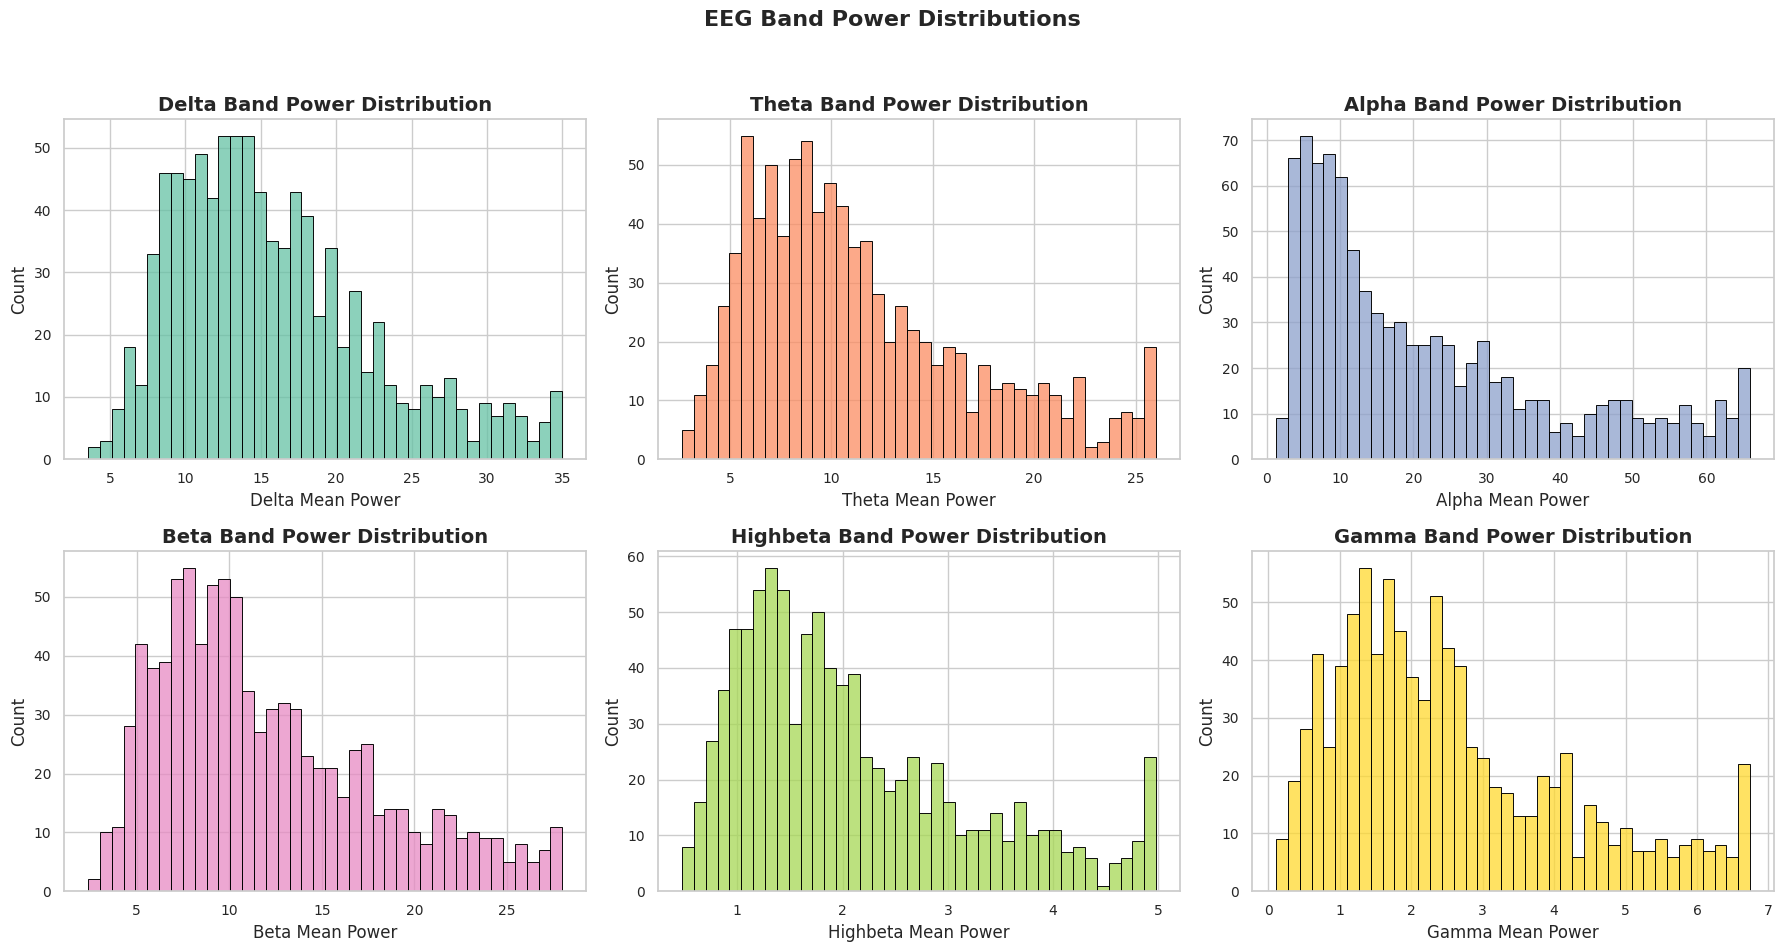

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", len(bands))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, band in enumerate(bands):
    ax = axes[idx]
    sns.histplot(
        df[f'{band}_mean'],
        bins=40,
        color=palette[idx],
        edgecolor='black',
        ax=ax
    )
    ax.set_title(f'{band.capitalize()} Band Power Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel(f'{band.capitalize()} Mean Power', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

for j in range(len(bands), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('EEG Band Power Distributions', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

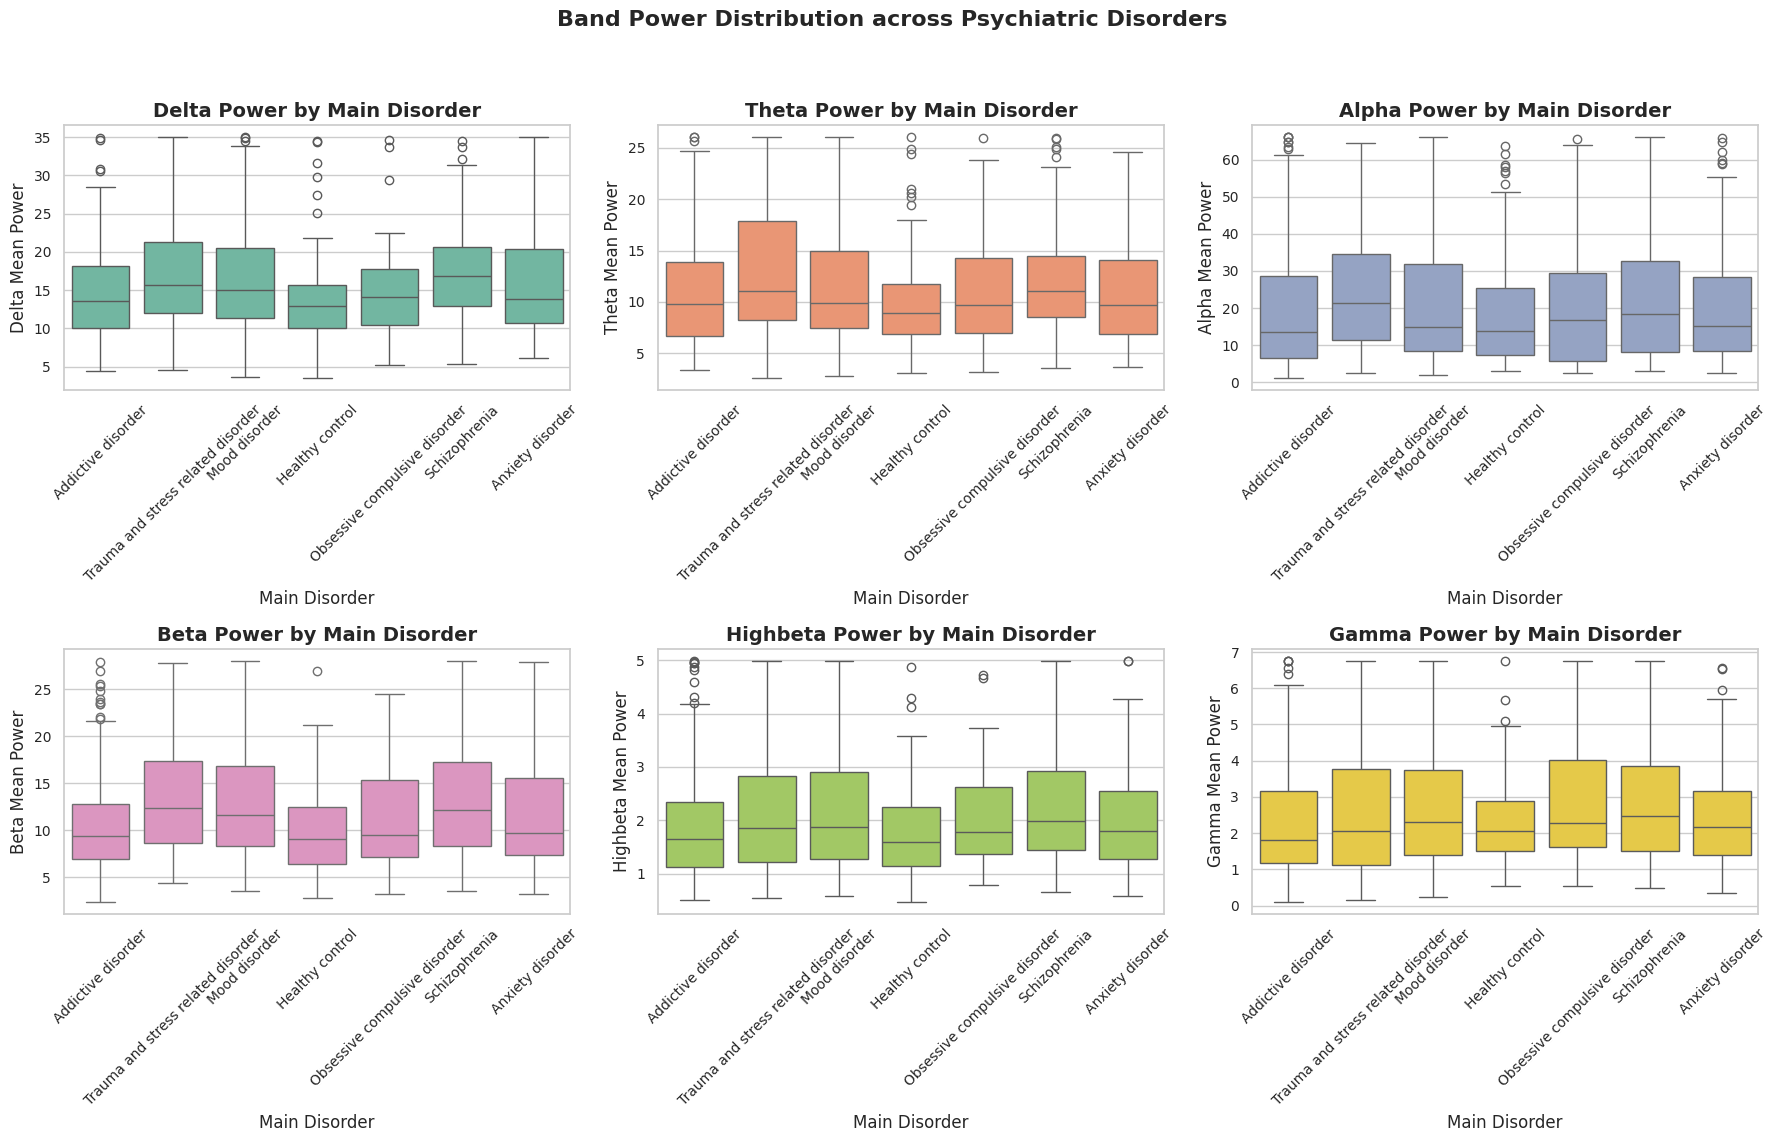

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", len(bands))

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, band in enumerate(bands):
    ax = axes[idx]
    sns.boxplot(
        x='main.disorder',
        y=f'{band}_mean',
        data=df,
        palette=[palette[idx]] * df['main.disorder'].nunique(),
        ax=ax
    )
    ax.set_title(f'{band.capitalize()} Power by Main Disorder', fontsize=14, fontweight='bold')
    ax.set_xlabel('Main Disorder', fontsize=12)
    ax.set_ylabel(f'{band.capitalize()} Mean Power', fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

fig.suptitle('Band Power Distribution across Psychiatric Disorders', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Electrode-wise PSD Heatmap per Disorder**

In [14]:
electrodes = ['FP1','FP2','F7','F3','Fz','F4','F8','C3','Cz','C4','P3','Pz','P4','O1','O2']
records = []
for dis in df['main.disorder'].unique():
    row = {'disorder': dis}
    for elec in electrodes:
        cols = [c for c in df.columns if c.startswith('AB.') and elec in c]
        row[elec] = df.loc[df['main.disorder']==dis, cols].mean().mean()
    records.append(row)
heat_df = pd.DataFrame(records).set_index('disorder')
fig = px.imshow(heat_df,
                title='Mean PSD per Electrode by Main Disorder',
                labels={'x':'Electrode','y':'Disorder','color':'Mean PSD'})
fig.show()

# **Scatter Plot: Alpha vs. Beta Power**

In [15]:
fig = px.scatter(df, x='alpha_mean', y='beta_mean',
                 color='specific.disorder',
                 title='Alpha vs Beta Power by Specific Disorder',
                 labels={'alpha_mean':'Alpha Mean Power','beta_mean':'Beta Mean Power'})
fig.show()

# **Pairplot of Selected PSD Features**

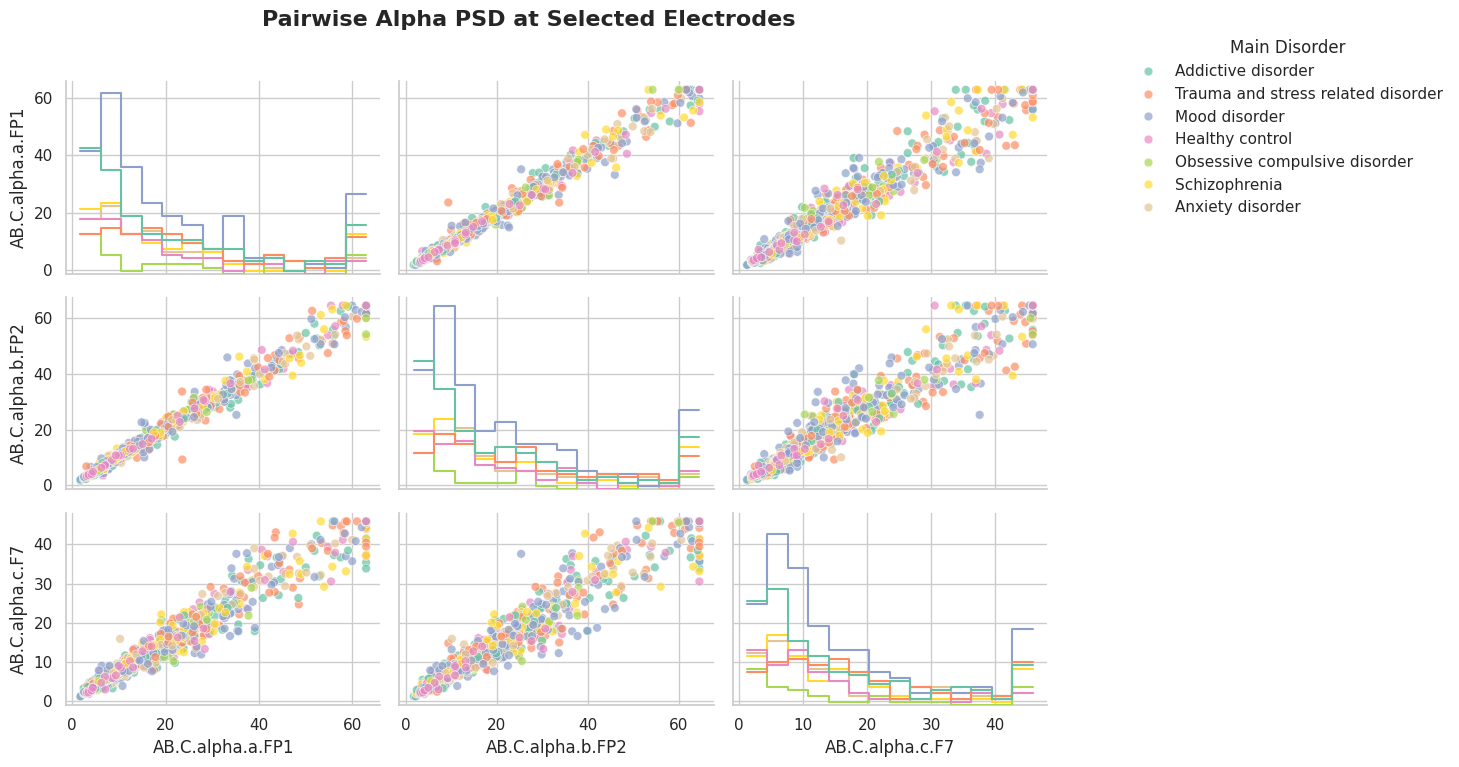

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_feats = [c for c in df.columns if c.startswith('AB.') and '.alpha.' in c][:3]

sns.set(style="whitegrid")
palette = sns.color_palette("Set2", df['main.disorder'].nunique())

g = sns.PairGrid(df, vars=sample_feats, hue='main.disorder', palette=palette, corner=False)

g.map_upper(sns.scatterplot, alpha=0.7, edgecolor="w", s=40)
g.map_lower(sns.scatterplot, alpha=0.7, edgecolor="w", s=40)

g.map_diag(sns.histplot, element='step', fill=False)

g.add_legend(title='Main Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Pairwise Alpha PSD at Selected Electrodes', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# **t-SNE Embedding of Coherence (Delta band)**

In [17]:
delta_coh = [c for c in df.columns if c.startswith('COH.') and '.delta.' in c]
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(df[delta_coh].fillna(0))
fig = px.scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                 color=df['main.disorder'],
                 title='t-SNE of Delta Coherence Features',
                 labels={'x':'Dim 1','y':'Dim 2'})
fig.show()

# **Mean Coherence per Frequency Band**

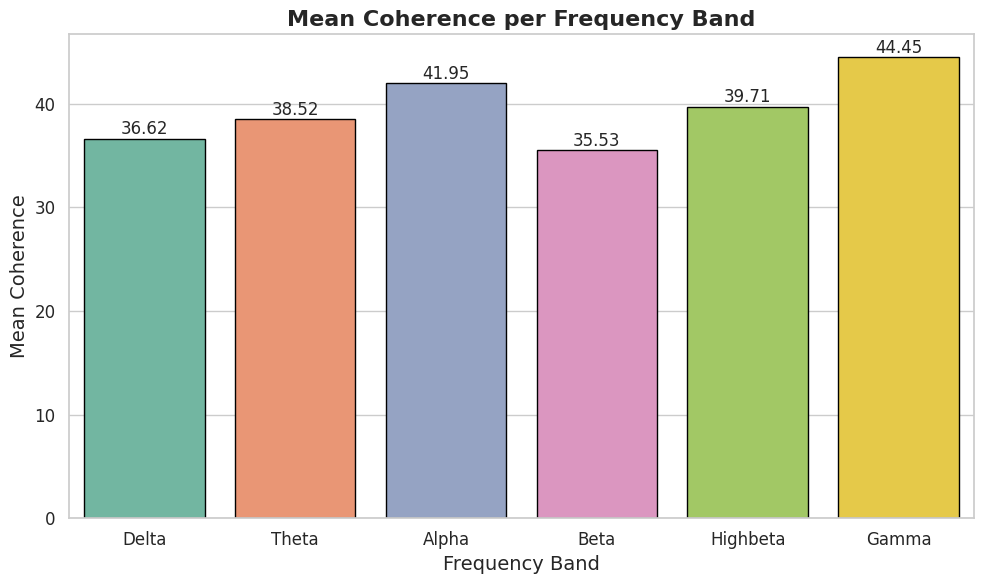

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
mean_coh = []
for band in bands:
    cols = [c for c in df.columns if c.startswith('COH.') and f'.{band}.' in c]
    mean_coh.append({'band': band.capitalize(), 'mean_coherence': df[cols].mean().mean()})
mean_coh_df = pd.DataFrame(mean_coh)

sns.set(style="whitegrid")
palette = sns.color_palette("Set2", len(bands))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x='band',
    y='mean_coherence',
    data=mean_coh_df,
    palette=palette,
    edgecolor='black',
    ax=ax
)
ax.set_title('Mean Coherence per Frequency Band', fontsize=16, fontweight='bold')
ax.set_xlabel('Frequency Band', fontsize=14)
ax.set_ylabel('Mean Coherence', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.01,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.tight_layout()
plt.show()

# **Alpha-band Coherence Network**

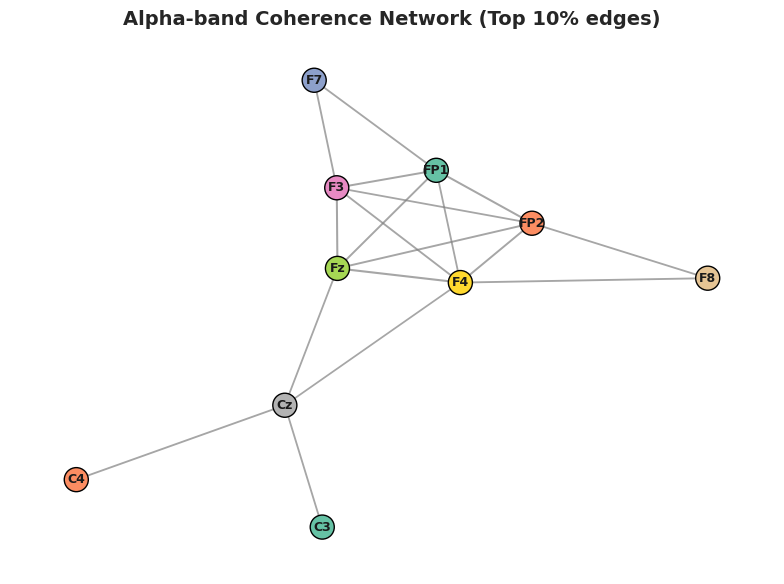

In [19]:
alpha_coh = [
    (col.split('.')[-3], col.split('.')[-1], df[col].mean())
    for col in df.columns if col.startswith('COH.') and '.alpha.' in col
]
thr = np.percentile([w for _,_,w in alpha_coh], 90)
G = nx.Graph()
for u,v,w in alpha_coh:
    if w >= thr:
        G.add_edge(u,v,weight=w)
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(8, 6))
sns.set(style="white")

weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw_networkx_edges(
    G, pos,
    width=[1.5 * (w / max(weights)) for w in weights],
    alpha=0.7,
    edge_color='gray'
)

node_colors = sns.color_palette("Set2", len(G.nodes()))
nx.draw_networkx_nodes(
    G, pos,
    node_size=300,
    node_color=node_colors,
    edgecolors='black'
)

nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

plt.title('Alpha-band Coherence Network (Top 10% edges)', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# **Radar Chart for Mean Band Power**

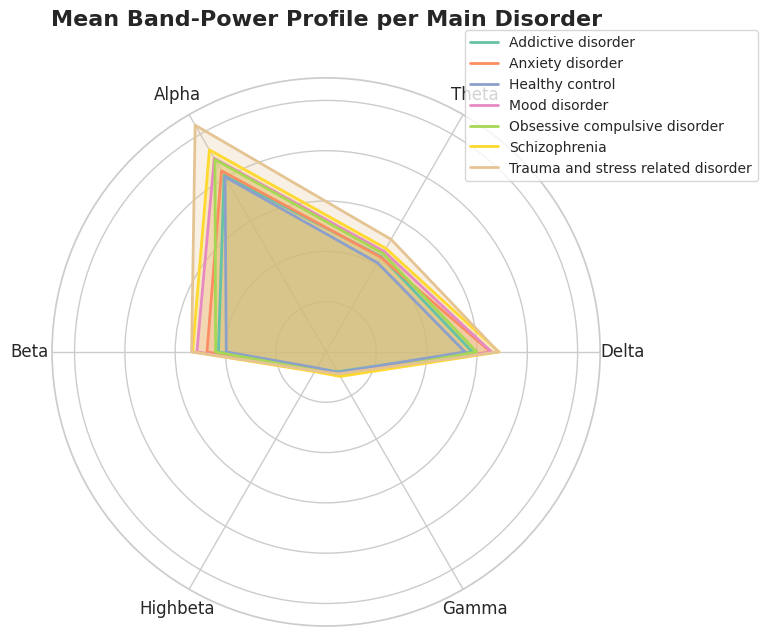

In [20]:
bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
for band in bands:
    mean_col = f'{band}_mean'
    if mean_col not in df.columns:
        cols = [c for c in df.columns if c.startswith('AB.') and f'.{band}.' in c]
        df[mean_col] = df[cols].mean(axis=1)


radar_df = df.groupby('main.disorder')[[f'{b}_mean' for b in bands]].mean()

num_bands = len(bands)
angles = np.linspace(0, 2 * np.pi, num_bands, endpoint=False).tolist()
angles += angles[:1]  # repeat first to close loop

sns.set(style="whitegrid")
palette = sns.color_palette("Set2", len(radar_df))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, (disorder, row) in enumerate(radar_df.iterrows()):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, color=palette[idx], linewidth=2, label=disorder)
    ax.fill(angles, values, color=palette[idx], alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels([b.capitalize() for b in bands], fontsize=12)
ax.set_yticklabels([])  # hide radial labels
ax.set_rlabel_position(30)

plt.title('Mean Band-Power Profile per Main Disorder', fontsize=16, fontweight='bold', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

plt.tight_layout()
plt.show()

# **Parallel Coordinates chart for PSD channels**

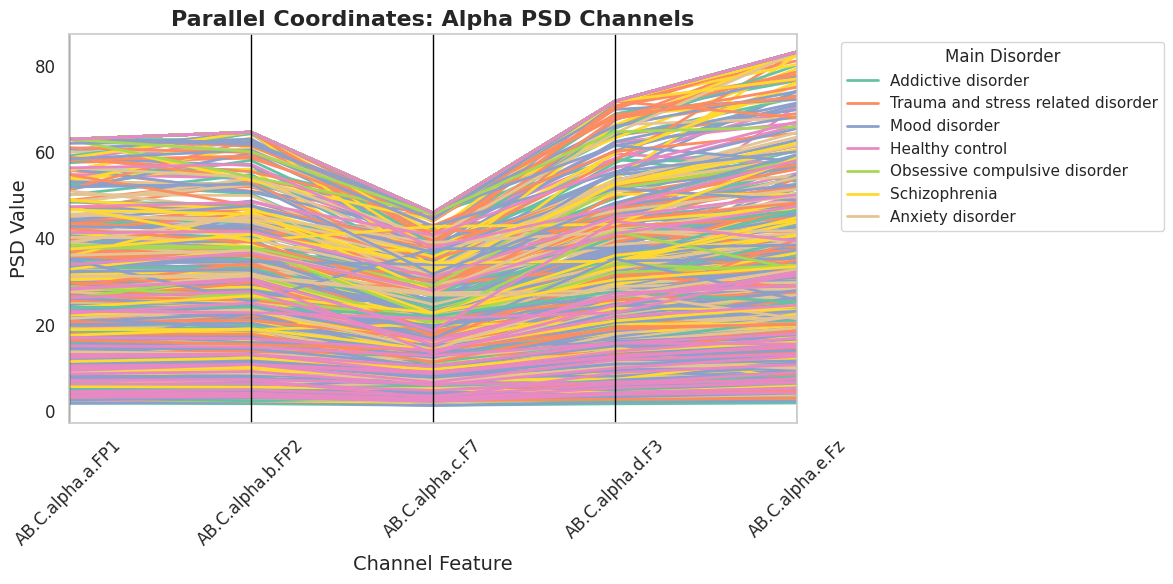

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from matplotlib.colors import to_hex

alpha_feats = [c for c in df.columns if c.startswith('AB.') and '.alpha.' in c][:5]
df_par = df[alpha_feats + ['main.disorder']]

sns.set(style="whitegrid")
unique_disorders = df_par['main.disorder'].unique().tolist()
palette = sns.color_palette("Set2", len(unique_disorders))
hex_colors = [to_hex(c) for c in palette]

plt.figure(figsize=(12, 6))
parallel_coordinates(
    df_par,
    class_column='main.disorder',
    cols=alpha_feats,
    color=hex_colors,
    linewidth=2
)

plt.title('Parallel Coordinates: Alpha PSD Channels', fontsize=16, fontweight='bold')
plt.xlabel('Channel Feature', fontsize=14)
plt.ylabel('PSD Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Main Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Few more Comparisions and Visualizations**

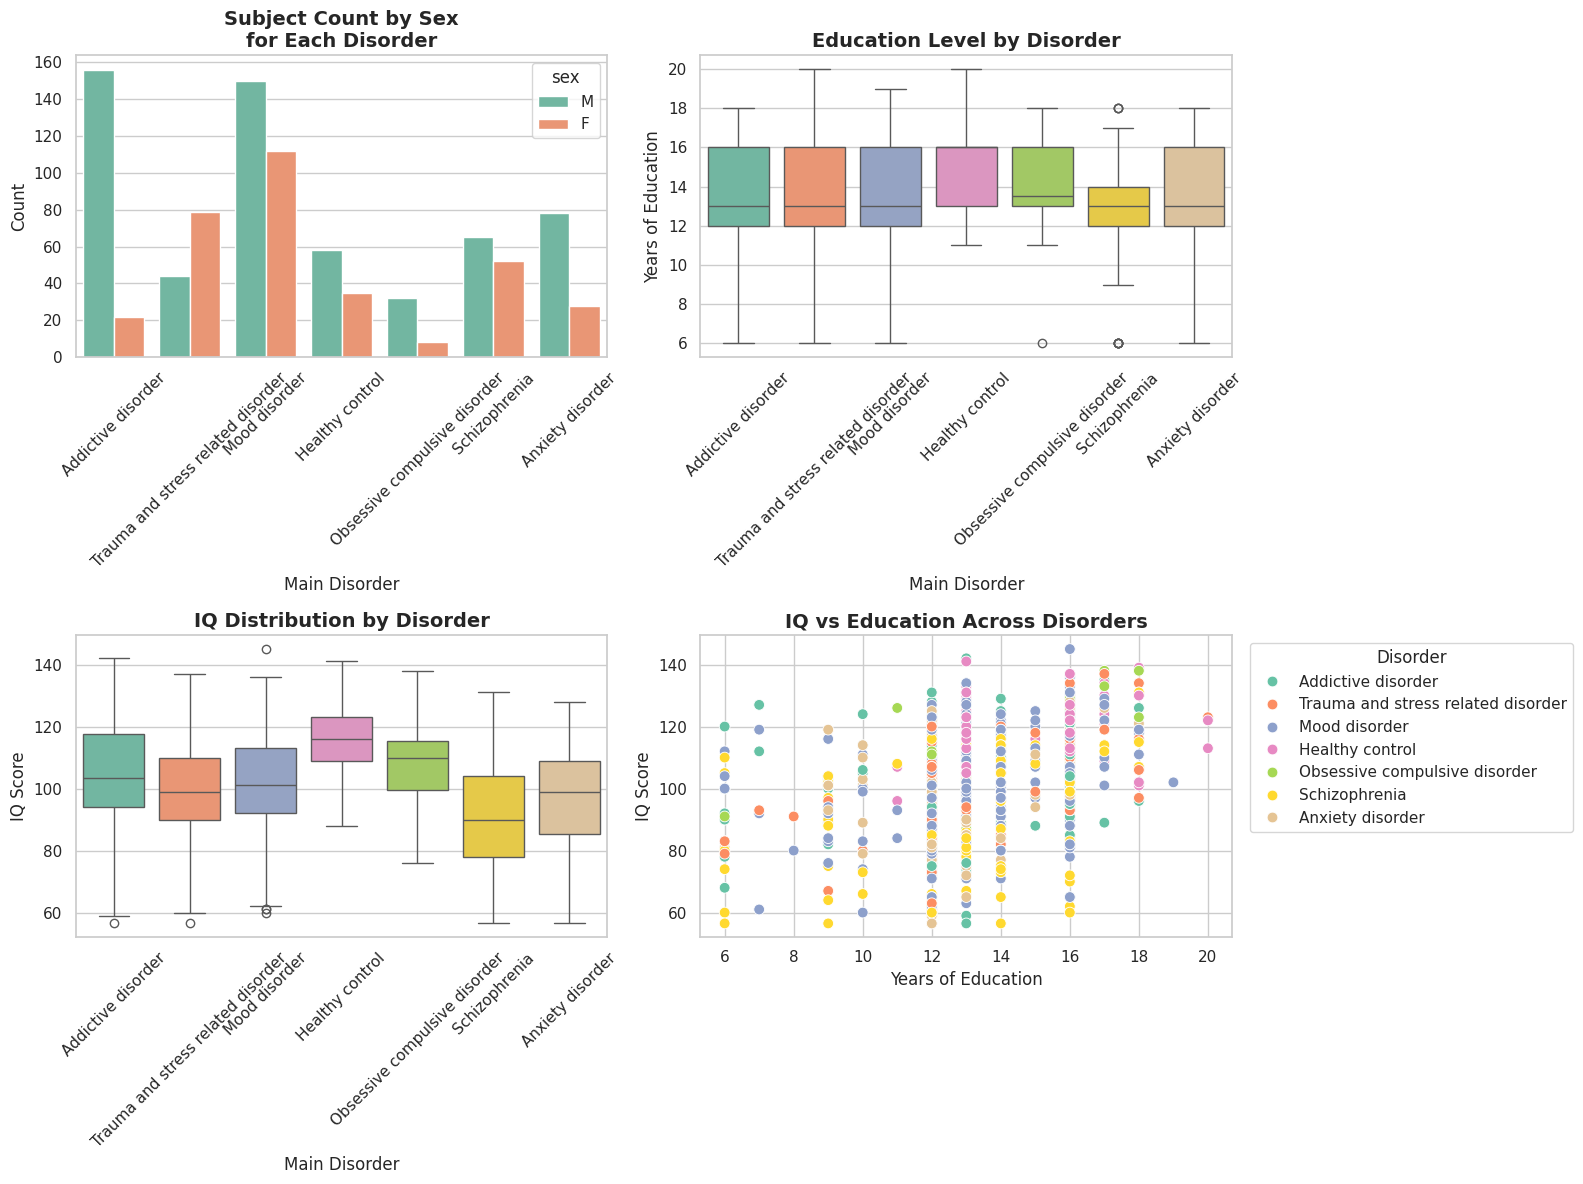

In [22]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# 3. Sex count by disorder
sns.countplot(
    data=df,
    x='main.disorder',
    hue='sex',
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title('Subject Count by Sex\nfor Each Disorder', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Main Disorder', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# 4. Education level by disorder
sns.boxplot(
    data=df,
    x='main.disorder',
    y='education',
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title('Education Level by Disorder', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Main Disorder', fontsize=12)
axes[1].set_ylabel('Years of Education', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# 5. IQ distribution by disorder
sns.boxplot(
    data=df,
    x='main.disorder',
    y='IQ',
    palette='Set2',
    ax=axes[2]
)
axes[2].set_title('IQ Distribution by Disorder', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Main Disorder', fontsize=12)
axes[2].set_ylabel('IQ Score', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

# 6. Education vs IQ colored by disorder
sns.scatterplot(
    data=df,
    x='education',
    y='IQ',
    hue='main.disorder',
    palette='Set2',
    s=60,
    ax=axes[3]
)
axes[3].set_title('IQ vs Education Across Disorders', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Years of Education', fontsize=12)
axes[3].set_ylabel('IQ Score', fontsize=12)
axes[3].legend(title='Disorder', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()